In [1]:
#계절별로 어느국가가 많이 방문하는지 알아보기위한 앱, 클러스터링

In [1]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 출력


/Users/marurun66/Documents/GitHub/foreigner


In [3]:
#데이터 로드
import pandas as pd
df=pd.read_csv('data/prophet_df.csv')

In [4]:
df['국적지역'].unique()

array(['그리스', '나이지리아', '남아프리카공화국', '네덜란드', '네팔', '노르웨이', '뉴질랜드', '대만',
       '덴마크', '독일', '라오스', '라트비아', '러시아', '루마니아', '리투아니아', '마카오', '말레이시아',
       '멕시코', '모로코', '몽골', '미국', '미얀마', '방글라데시', '베트남', '벨기에', '불가리아',
       '브라질', '브루나이', '사우디아라비아', '스리랑카', '스웨덴', '스위스', '스페인', '슬로바키아',
       '시리아', '싱가포르', '아랍에미리트연합', '아르헨티나', '아일랜드', '에콰도르', '에티오피아', '영국',
       '오스트레일리아', '오스트리아', '요르단', '우즈베키스탄', '우크라이나', '유고슬라비아', '이라크',
       '이란', '이스라엘', '이집트', '이탈리아', '인도', '인도네시아', '일본', '중국', '체코공화국',
       '칠레', '카자흐스탄', '캄보디아', '캐나다', '케냐', '콜롬비아', '쿠웨이트', '크로아티아',
       '키르기즈', '타지키스탄', '태국', '튀니지', '튀르키예', '파키스탄', '페루', '포르투갈', '폴란드',
       '프랑스', '핀란드', '필리핀', '헝가리', '홍콩'], dtype=object)

In [5]:
#월을 계절로 변환하는 함수
def get_season(month):
    if month in [3, 4, 5]:
        return "봄"
    elif month in [6, 7, 8]:
        return "여름"
    elif month in [9, 10, 11]:
        return "가을"
    else:
        return "겨울"

In [6]:
# 데이터 전처리
df['연도'] = df['방문년월'].astype(str).str[:4].astype(int)
df['월'] = df['방문년월'].astype(str).str[4:].astype(int)
df['계절'] = df['월'].apply(get_season)

In [7]:
df

,국적지역,방문년월,입국자수,연도,월,계절
0,그리스,202501,807,2025,1,겨울
1,그리스,202502,979,2025,2,겨울
2,그리스,202503,1143,2025,3,봄
3,그리스,202504,1268,2025,4,봄
4,그리스,202505,1029,2025,5,봄
...,...,...,...,...,...,...
1915,홍콩,202608,92514,2026,8,여름
1916,홍콩,202609,99970,2026,9,가을
1917,홍콩,202610,109266,2026,10,가을
1918,홍콩,202611,117038,2026,11,가을


In [8]:
seasonal_df = df.groupby(['국적지역', '계절'])['입국자수'].sum().unstack(fill_value=0)

In [9]:
seasonal_df

계절,가을,겨울,봄,여름
국적지역,,,,
그리스,7687,6658,7507,8051
나이지리아,1364,1447,1025,1678
남아프리카공화국,11830,11354,11124,12755
네덜란드,43772,33398,42065,47566
네팔,21484,27121,20390,30945
...,...,...,...,...
프랑스,140070,105701,136372,140656
핀란드,10791,10055,10734,11731
필리핀,404779,359889,366033,378967


In [10]:
#컬럼순서 봄 여름 가을 겨울로 변경
seasonal_df = seasonal_df[['봄', '여름', '가을', '겨울']]

In [11]:
seasonal_df.to_csv('data/seasonal_df.csv', index=True)

In [12]:
seasonal_df.columns

Index(['봄', '여름', '가을', '겨울'], dtype='object', name='계절')

In [13]:
#한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


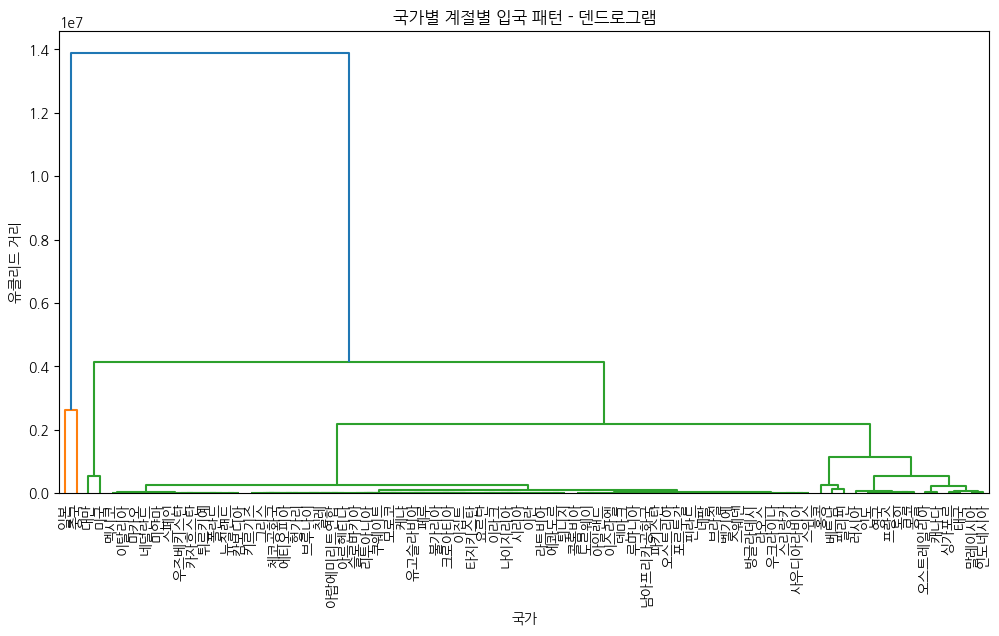

In [14]:
#덴드로그램 확인
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 클러스터링 수행
linkage_matrix = linkage(seasonal_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=seasonal_df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('국가별 계절별 입국 패턴 - 덴드로그램')
plt.xlabel('국가')
plt.ylabel('유클리드 거리')
plt.savefig('image/seasonal_dendrogram.png')
plt.show()

In [15]:
# 5개 클러스터가 적절해보임

In [16]:
# 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage, fcluster

linkage_matrix = linkage(seasonal_df, method='ward')
num_clusters = 5
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
seasonal_df['클러스터'] = clusters

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_15678/2565591907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_df['클러스터'] = clusters


In [17]:
seasonal_df

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
그리스,7507,8051,7687,6658,4
나이지리아,1025,1678,1364,1447,4
남아프리카공화국,11124,12755,11830,11354,4
네덜란드,42065,47566,43772,33398,4
네팔,20390,30945,21484,27121,4
...,...,...,...,...,...
프랑스,136372,140656,140070,105701,5
핀란드,10734,11731,10791,10055,4
필리핀,366033,378967,404779,359889,5


In [18]:
#seasonal_df 저장
seasonal_df.to_csv('data/seasonal_df.csv', index=True)

In [19]:
#1번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 1]


계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
일본,2944428,2926100,3241509,2655000,1


In [20]:
#2번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 2]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
중국,4133724,4369862,4510109,3972187,2


In [21]:
#3번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 3]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
대만,1319949,1202872,1285939,1137317,3
미국,1039674,1002547,1056241,796179,3


In [22]:
#4번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 4]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
그리스,7507,8051,7687,6658,4
나이지리아,1025,1678,1364,1447,4
남아프리카공화국,11124,12755,11830,11354,4
네덜란드,42065,47566,43772,33398,4
네팔,20390,30945,21484,27121,4
...,...,...,...,...,...
페루,5070,4802,5830,4147,4
포르투갈,11099,12004,12027,9740,4
폴란드,37785,38311,39632,30085,4


In [23]:
seasonal_df[seasonal_df['클러스터'] == 5]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
독일,126208,125770,127089,99820,5
러시아,167702,156225,163049,135976,5
말레이시아,244497,237715,276358,265044,5
몽골,103243,122024,120741,109256,5
베트남,424980,468845,485312,406289,5
싱가포르,257287,210277,299801,254517,5
영국,136168,133452,133817,110448,5
오스트레일리아,200468,190006,212052,196837,5
인도,137371,142356,149651,113465,5


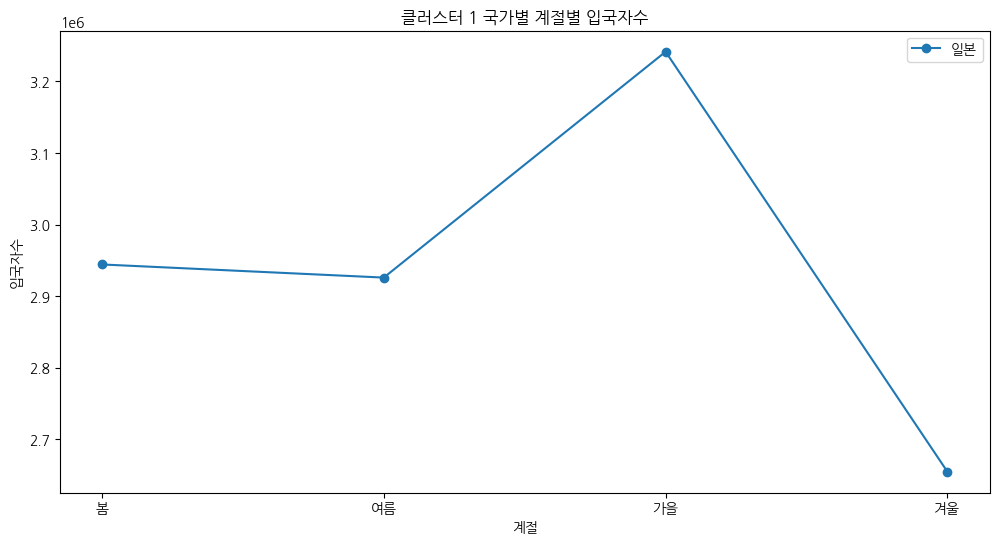

In [24]:
#클러스터별 분석
#클러스터 1
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 1].T.drop('클러스터'), marker='o')
plt.title('클러스터 1 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 1].index)
plt.savefig('image/seasonal_cluster1.png')
plt.show()

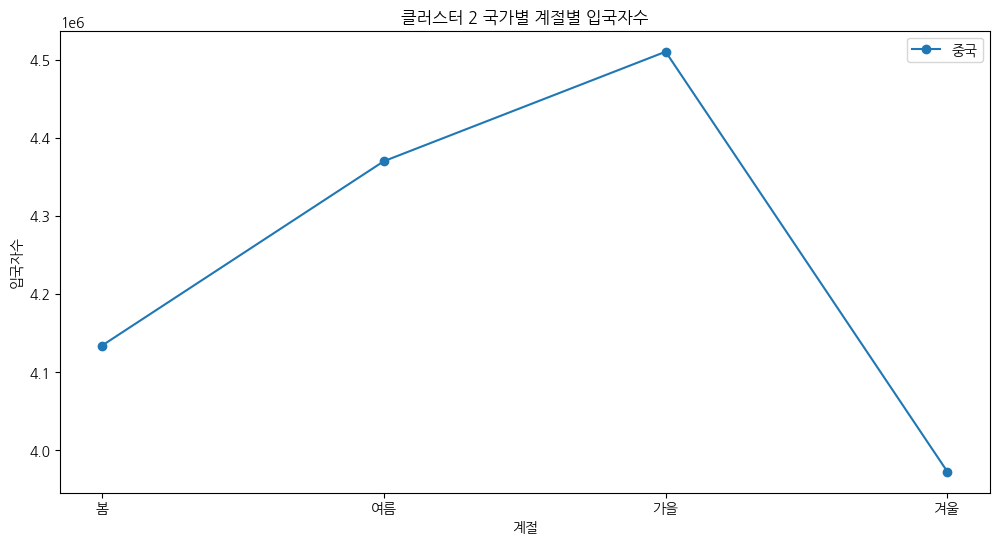

In [25]:
#클러스터 2
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 2].T.drop('클러스터'), marker='o')
plt.title('클러스터 2 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 2].index)
plt.savefig('image/seasonal_cluster2.png')
plt.show()

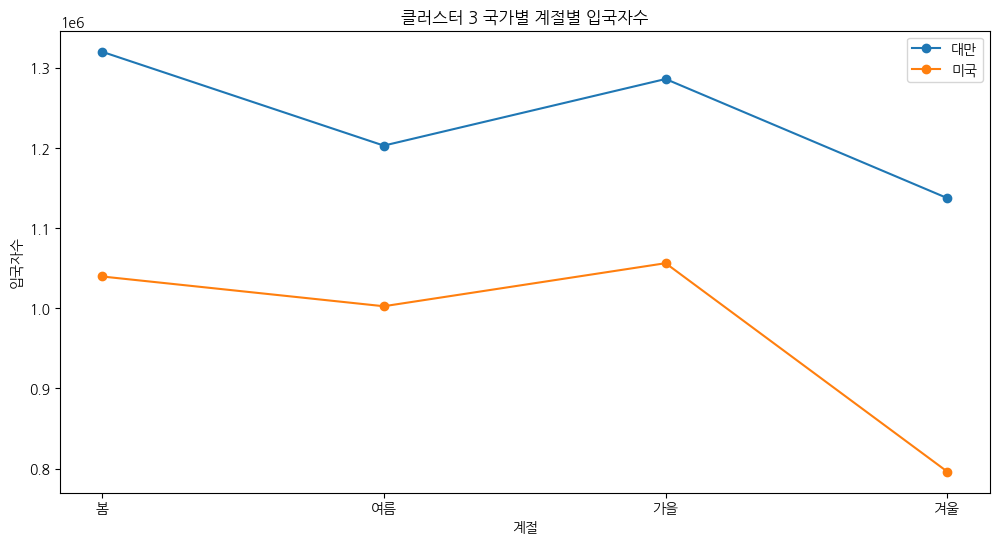

In [26]:
#클러스터 3
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 3].T.drop('클러스터'), marker='o')
plt.title('클러스터 3 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 3].index)
plt.savefig('image/seasonal_cluster3.png')
plt.show()

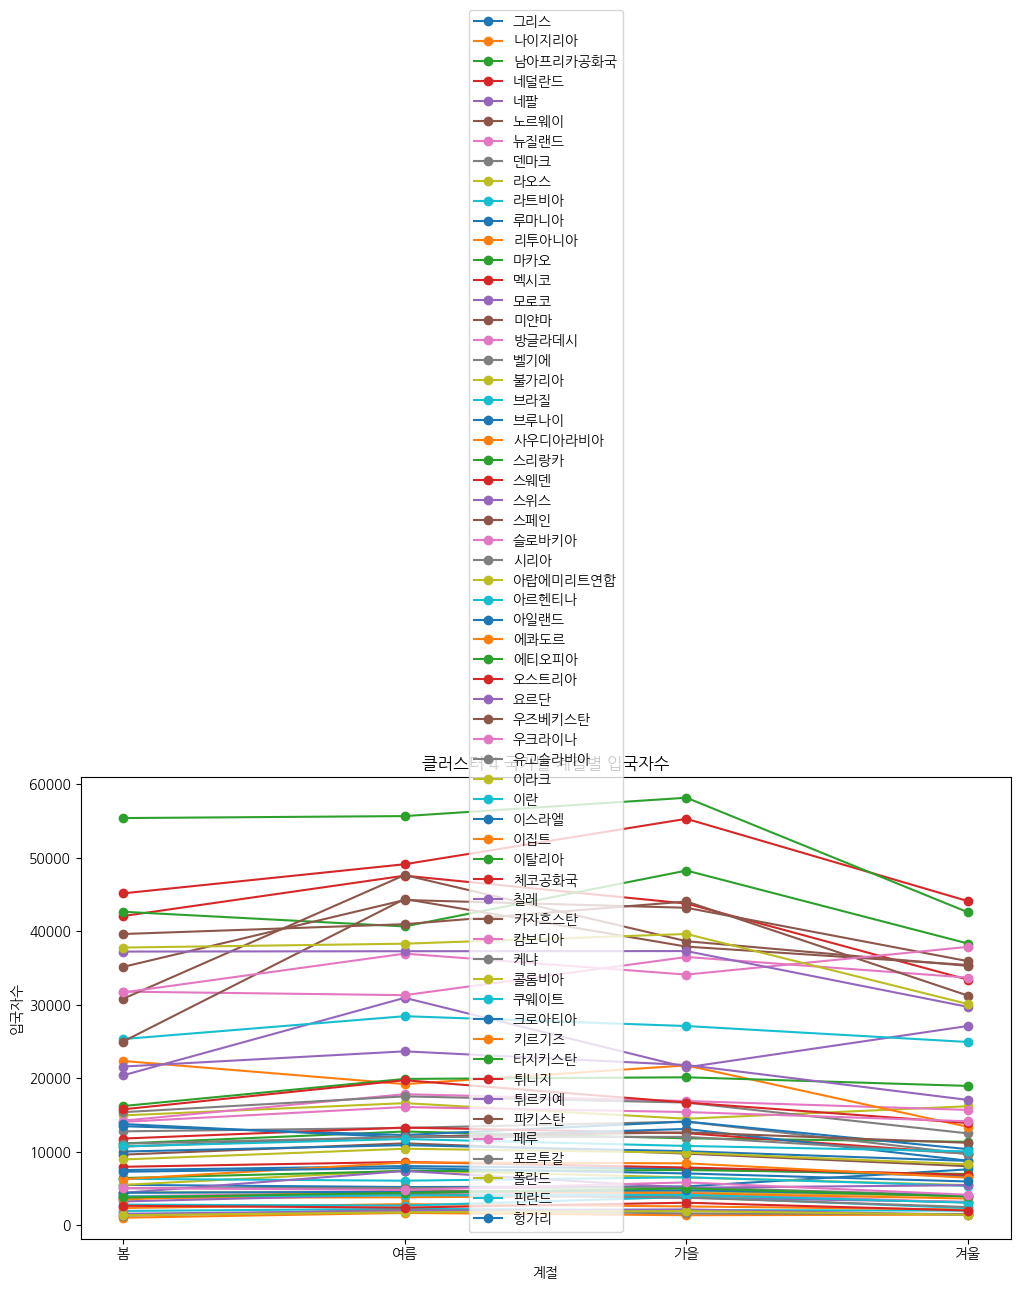

In [27]:
#클러스터 4
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 4].T.drop('클러스터'), marker='o')
plt.title('클러스터 4 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 4].index)
plt.savefig('image/seasonal_cluster4.png')
plt.show()

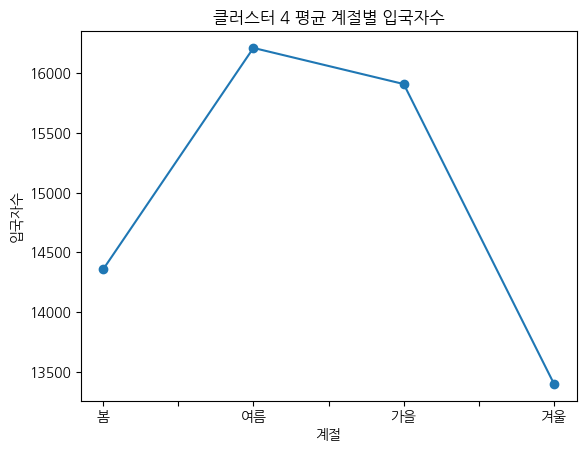

In [28]:
#클러스터4는 국가가 너무 많아 그래프가 보기 힘들어서 평균값으로 확인
seasonal_df[seasonal_df['클러스터'] == 4].drop(columns=['클러스터']).mean().plot(kind='line', marker='o')
plt.title('클러스터 4 평균 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.savefig('image/seasonal_cluster4_mean.png')
plt.show()

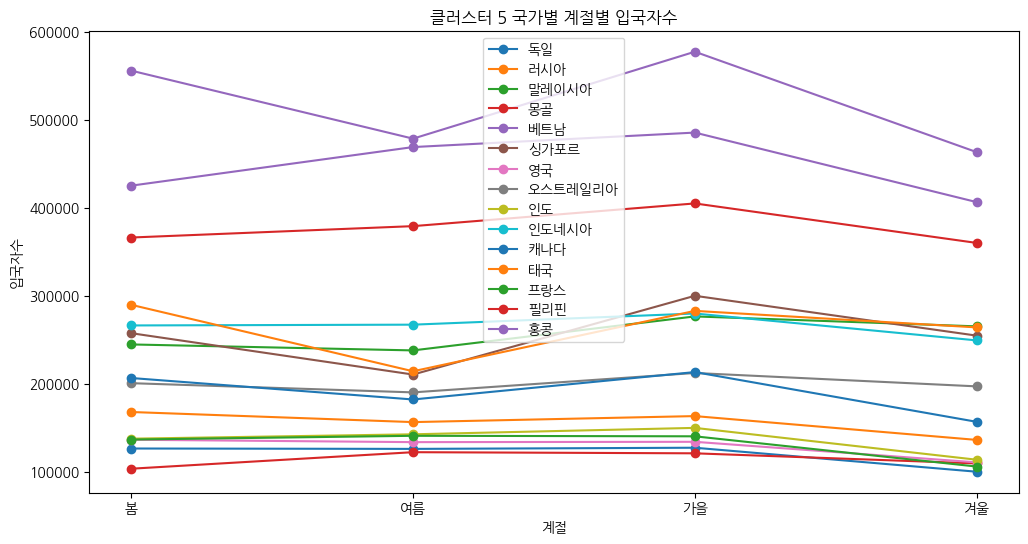

In [29]:
#클러스터 5
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 5].T.drop('클러스터'), marker='o')
plt.title('클러스터 5 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 5].index)
plt.savefig('image/seasonal_cluster5.png')
plt.show()

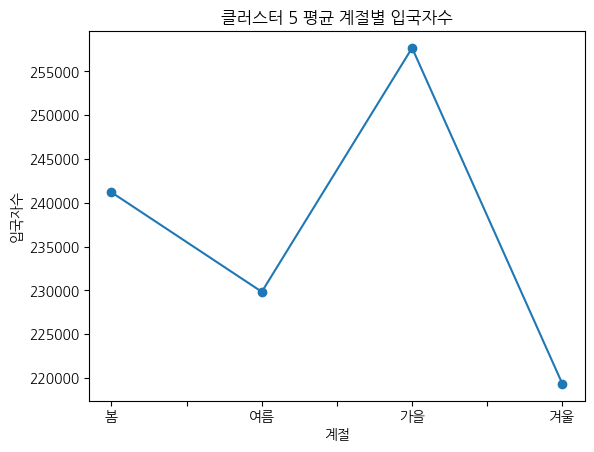

In [30]:
#클러스터 5도 평균값으로 봐보기
seasonal_df[seasonal_df['클러스터'] == 5].drop(columns=['클러스터']).mean().plot(kind='line', marker='o')
plt.title('클러스터 5 평균 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.savefig('image/seasonal_cluster5_mean.png')
plt.show()